5.1 Load and Prepare the data: [1]


Pick an color image of your choice and do the following.
1. Load the image using image reading library, you can use Pillow or matplotlib or any other library of your
confidence.


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
#Necessary imports:
#We import libaries like numPy stands for numerical library used for scientific computing and data analysis, matplotlib for visualization, 
# seaborn for standard visualization, cv2 used for displaying an image in window. 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import cv2

Pixel type: uint8
Number of dimensions: 3
Image size: (256, 256, 4)


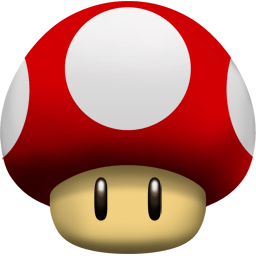

In [ ]:
#First the image file ludo.png is opened and stored it in a numpy array called im.
#print the information about the image, including its dimensions, type of pixel data, and number of dimensions.
from PIL import Image
import numpy as np
img = Image.open("/content/drive/MyDrive/ludo.png")
im = np.array(img) # stores the image in Numpy array.
print('Pixel type:', im.dtype) 
print('Number of dimensions:', im.ndim) #[Dimension-1 for Gray Scale image, Dimension-3 for RGB image]
print('Image size:', im.shape)

img

2. For the simplicity, convert the image into gray scale i.e. black and white.

(256, 256)


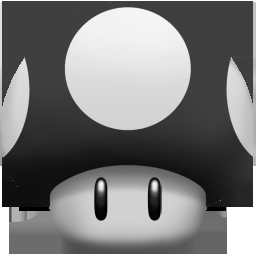

In [ ]:
#The image is converetd into grayscale and saved it as an array of gray values.
imgGray = img.convert('L') 
img_gray = np.array(imgGray)
print(img_gray.shape)
pil_img = Image.fromarray(img_gray)#Creates a new variable pil_img, which is an image object that was created from the array of gray values saved in imgGray.
pil_img.save("Gray_Ludo.jpg")#saving the converted image in file named Gray_Ludo.jpg
imgGray

5.2 Standardize/Scale the data:[1]

To assure all the initial variables are transformed to same scale, it is a most to perform scaling operation before
any PCA operation. For the same purpose, we will perform standardization of data, which satisfies the following
expression:


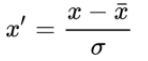

In [ ]:
#Calculating the standard deviation of the image .
X_std = (img_gray - img_gray.mean(axis = 0))/img_gray.std(axis = 0)# axis=0 is the axis that runs downward down the rows so axis collapse the row and calculate
print(X_std)
X_std.shape # Looking number of rows and columns.

[[ 1.07647762  1.08641687  1.61342463 ...  1.31592306  1.31136223
   1.30548687]
 [ 1.07647762  1.08641687 -0.59170418 ...  1.31592306  1.31136223
   1.30548687]
 [ 0.18099267  0.16518551 -0.59170418 ... -0.52180315 -0.48765671
  -0.46371238]
 ...
 [ 1.07647762  1.08641687  1.61342463 ...  1.31592306  1.31136223
   1.30548687]
 [ 1.07647762  1.08641687  1.61342463 ...  1.31592306  1.31136223
   1.30548687]
 [ 1.07647762  1.08641687  1.61342463 ...  1.31592306  1.31136223
   1.30548687]]


(256, 256)

5.3 Calculate Covariance Matrix:[1]

Each element of the covariance matrix represents covariance between each ijth element. The covariance between
two elements is calculated and stored in the matrix as shown in picture below:

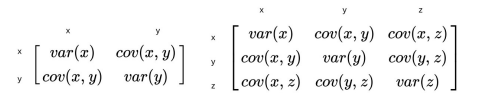

In [ ]:
#calculating covariance matrix of a standard deviation vector.
mean_vec = np.mean(X_std, axis=0) #The code calculates the mean of X_std
cov1 = X_std - mean_vec # mean is subtraced from standard deviation and stored in matrix cov1
cov_mat = (cov1).T.dot((cov1)) / (X_std.shape[0]-1) # T returns their transpose and shape[0]-1 working along the first dimension of array.
print('Covariance matrix \n%s' %cov_mat)
cov_mat.shape

Covariance matrix 
[[1.00392157 1.00267366 0.04785121 ... 0.85691582 0.87099166 0.87921737]
 [1.00267366 1.00392157 0.06517984 ... 0.86303343 0.87517893 0.88144841]
 [0.04785121 0.06517984 1.00392157 ... 0.2491439  0.22644556 0.21062948]
 ...
 [0.85691582 0.86303343 0.2491439  ... 1.00392157 1.00267661 1.00005708]
 [0.87099166 0.87517893 0.22644556 ... 1.00267661 1.00392157 1.00306314]
 [0.87921737 0.88144841 0.21062948 ... 1.00005708 1.00306314 1.00392157]]


(256, 256)

5.4 Eigen Decomposition: [2]

Decompose a covariance matrix into eigen values and eigen vectors:

image.png

Where:
1. A(n*n): −Covariance Matrix.
2. P:- Eigen Vector of Covariance Matrix.
3. D:- Diagonal Matrix. Diagonal elements are Eigen Values.
4. PI: −Inverse of Eigen Vector.

In [ ]:
# Eigenvectors and Eigenvalues computation from the covariance matrix.
eigen_vals, eigen_vecs = np.linalg.eig(cov_mat)

print("Eigenvalues")
print(eigen_vals)
print("Eigenvectors")
print(eigen_vecs)
 
P = eigen_vecs
D = np.diag(eigen_vals)
PI = np.linalg.inv(P)
 
reconstructed_A = P @ D @ PI
#comparing covariance matrix and PDPI.
print(np.allclose(cov_mat, reconstructed_A)) 

Eigenvalues
[ 1.16743982e+02  5.90993061e+01  3.12357719e+01  1.37391709e+01
  1.06625591e+01  4.98517535e+00  3.94819528e+00  2.78903447e+00
  2.39662652e+00  1.92455390e+00  1.20641871e+00  1.15691577e+00
  7.34041122e-01  6.24287416e-01  5.58637429e-01  5.71223101e-01
  4.55704752e-01  3.40850451e-01  3.08622986e-01  2.98234957e-01
  2.37688419e-01  2.12202734e-01  1.92873980e-01  1.69830330e-01
  1.65004977e-01  1.47093379e-01  1.30495899e-01  1.21589829e-01
  1.14502164e-01  1.06651271e-01  9.76369245e-02  8.93021180e-02
  8.22488929e-02  7.91436170e-02  7.39344376e-02  6.52308254e-02
  6.09114706e-02  5.90664430e-02  5.64952514e-02  5.35030692e-02
  4.56493507e-02  4.25038529e-02  4.01993418e-02  3.94496111e-02
  3.68296273e-02  3.58714459e-02  3.40058376e-02  3.14418944e-02
  3.04562644e-02  2.78558147e-02  2.67584682e-02  2.50850983e-02
  2.34056363e-02  2.24202194e-02  2.09900245e-02  1.89942636e-02
  1.91111720e-02  1.72442582e-02  1.65580345e-02  1.55854026e-02
  1.54478194e

In [ ]:
#the sum of the square of each value in an Eigenvector is 1. 
#So checking if it holds true which mean we have computed Eigenvectors correctly.
for ev in eigen_vecs.T:
    np.testing.assert_array_almost_equal(1.0, np.linalg.norm(ev))
print('Everything ok!')

Everything ok!


5.5 Identify Principal Components:[2]

Determine the explained variance by each principal components, based on this we can determine how
many principal components to pick from.
• Experiment with Principal Components:
– Pick three different combination of principal components with various explained variance
value and compare the result.

In [ ]:
#we sort the Eigenvalues in descending order.
indices = eigen_vals.argsort()[::-1]
eigenvalues = eigen_vals[indices] 
eigenvectors = eigen_vecs[:, indices]
   

In [ ]:
# going to choose principal components  for new feature subspace
#variance_explained tells us how much information (variance) can be attributed to each of the principal components.
#individual explained variance
variance_explained = eigenvalues / eigenvalues.sum()
variance_explained

array([ 4.54249807e-01,  2.29954881e-01,  1.21538114e-01,  5.34589931e-02,
        4.14879238e-02,  1.93972735e-02,  1.53623931e-02,  1.08521086e-02,
        9.32525274e-03,  7.48842233e-03,  4.69416460e-03,  4.50154908e-03,
        2.85614756e-03,  2.42909685e-03,  2.22262407e-03,  2.17365333e-03,
        1.77314318e-03,  1.32624611e-03,  1.20084933e-03,  1.16042960e-03,
        9.24843551e-04,  8.25678972e-04,  7.50470959e-04,  6.60808321e-04,
        6.42032917e-04,  5.72339044e-04,  5.07758398e-04,  4.73104955e-04,
        4.45526912e-04,  4.14979159e-04,  3.79904415e-04,  3.47473756e-04,
        3.20029719e-04,  3.07947118e-04,  2.87678247e-04,  2.53812568e-04,
        2.37005997e-04,  2.29827011e-04,  2.19822527e-04,  2.08179972e-04,
        1.77621222e-04,  1.65382118e-04,  1.56415286e-04,  1.53498090e-04,
        1.43303756e-04,  1.39575481e-04,  1.32316415e-04,  1.22340135e-04,
        1.18505057e-04,  1.08386730e-04,  1.04116965e-04,  9.76058971e-05,
        9.10711250e-05,  

In [ ]:
#calculating the accumulation of variance for each principal component number.
cumulative_variance_explained = np.cumsum(variance_explained)
print(cumulative_variance_explained)

[0.45424981 0.68420469 0.8057428  0.85920179 0.90068972 0.92008699
 0.93544938 0.94630149 0.95562675 0.96311517 0.96780933 0.97231088
 0.97516703 0.97759613 0.97981875 0.9819924  0.98376555 0.98509179
 0.98629264 0.98745307 0.98837792 0.98920359 0.98995407 0.99061487
 0.99125691 0.99182925 0.992337   0.99281011 0.99325564 0.99367062
 0.99405052 0.99439799 0.99471802 0.99502597 0.99531365 0.99556746
 0.99580447 0.99603429 0.99625412 0.9964623  0.99663992 0.9968053
 0.99696172 0.99711521 0.99725852 0.99739809 0.99753041 0.99765275
 0.99777125 0.99787964 0.99798376 0.99808136 0.99817244 0.99825967
 0.99834134 0.99841571 0.99848961 0.99855671 0.99862114 0.99868178
 0.99874189 0.99880105 0.9988586  0.99891167 0.99896379 0.99901409
 0.99906336 0.99910943 0.99915119 0.99919146 0.99923043 0.99926888
 0.99930553 0.99934117 0.99937532 0.99940815 0.99943952 0.99947014
 0.99949865 0.99952455 0.99954965 0.9995726  0.9995947  0.99961421
 0.99963282 0.99965079 0.99966767 0.99968328 0.99969872 0.99971

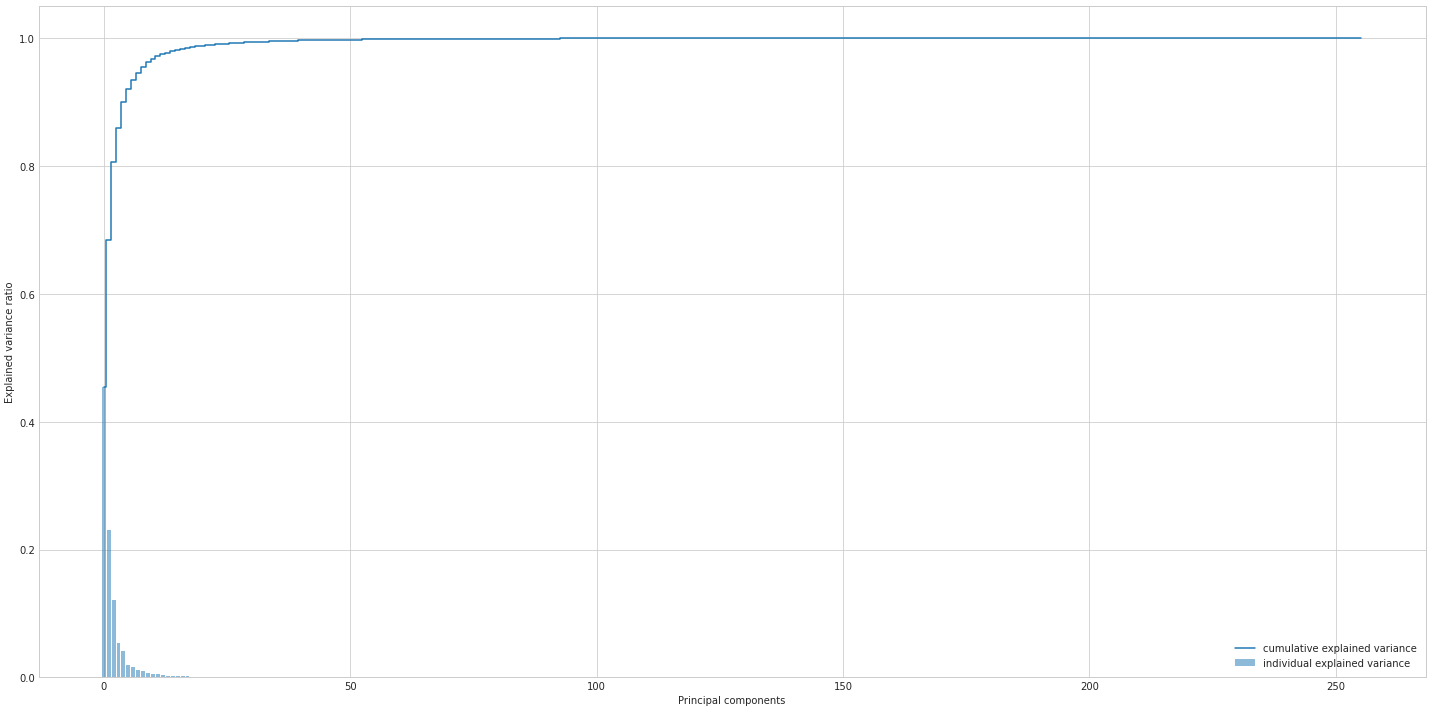

In [ ]:
#The cumulative explained variance shows the accumulation of variance for each principal component number. 
#The individual explained variance describes the variance of each principal component.
with plt.style.context('seaborn-whitegrid'):
    plt.figure(figsize=(20, 10))
    
    plt.bar(range(256), variance_explained, alpha=0.5, align='center',
            label='individual explained variance')
    plt.step(range(256), cumulative_variance_explained, where='mid',
             label='cumulative explained variance')
    plt.ylabel('Explained variance ratio')
    plt.xlabel('Principal components')
    plt.legend(loc='best')
    plt.tight_layout()
    plt.savefig('projected_data2.pdf')
    #In this graph the first principal component stores the maximum possible information
    #The second one stores the remaining maximum info and so on.

In [ ]:
#the eigenvector with the highest eigenvalue is the most significant and thus forms the first principal component. 
#replacing the original data axis with the newly formed Principal Components
no_of_component = 1
selected_components = eigenvectors[:, :no_of_component ]#list of eigenvectors that are selected from the matrix X_std.

Projected_data1 = np.dot(X_std, selected_components)

reconstructed_image1 = (np.dot(Projected_data1, selected_components.T)) + mean_vec# selected components are used to reconstruct an image with mean vector.

print(reconstructed_image1)

[[ 1.46432536  1.43362057  0.88454888 ...  0.52750028  0.58818625
   0.63299625]
 [-0.45817293 -0.4485657  -0.2767666  ... -0.16504962 -0.18403766
  -0.19805827]
 [-0.46209188 -0.45240248 -0.2791339  ... -0.16646136 -0.18561182
  -0.19975235]
 ...
 [-0.0592514  -0.05800899 -0.03579175 ... -0.02134439 -0.02379994
  -0.0256131 ]
 [ 1.46432536  1.43362057  0.88454888 ...  0.52750028  0.58818625
   0.63299625]
 [ 1.46432536  1.43362057  0.88454888 ...  0.52750028  0.58818625
   0.63299625]]


In [ ]:
no_of_component = 5
selected_components = eigenvectors[:, :no_of_component ]

Projected_data2 = np.dot(X_std, selected_components)

reconstructed_image2 = (np.dot(Projected_data2, selected_components.T)) + mean_vec

print(reconstructed_image2)

[[ 2.72891709  2.71846522  2.799574   ...  2.3151228   2.36099595
   2.3889878 ]
 [-0.063758   -0.06176489 -0.07301181 ...  0.32706329  0.32123995
   0.31349527]
 [-0.19947981 -0.19885812 -0.09087393 ...  0.18436161  0.1787742
   0.17147374]
 ...
 [ 0.0040774   0.03112583  1.54089527 ...  0.65537635  0.61960439
   0.58924874]
 [ 2.72891709  2.71846522  2.799574   ...  2.3151228   2.36099595
   2.3889878 ]
 [ 2.72891709  2.71846522  2.799574   ...  2.3151228   2.36099595
   2.3889878 ]]


In [ ]:
no_of_component = 18
selected_components = eigenvectors[:, :no_of_component ]

Projected_data3 = np.dot(X_std, selected_components)

reconstructed_image3 = (np.dot(Projected_data3, selected_components.T)) + mean_vec

print(reconstructed_image3)

[[ 1.42667211  1.49662238  1.58950945 ...  1.0849963   1.06399775
   1.02363629]
 [ 0.7678807   0.7854508  -0.7597188  ...  1.22194132  1.21244643
   1.19501377]
 [-0.48291989 -0.50651812 -0.59609917 ... -0.12289276 -0.10364715
  -0.09486158]
 ...
 [ 0.84904999  0.844378    1.61312639 ...  1.49941753  1.49468742
   1.49242033]
 [ 1.42667211  1.49662238  1.58950945 ...  1.0849963   1.06399775
   1.02363629]
 [ 1.42667211  1.49662238  1.58950945 ...  1.0849963   1.06399775
   1.02363629]]


5.6 Reconstruction of the image: [3]

Reconstruct the image based on number of principal components you picked in step 5.5.
Reconstruct all three images and conclude the result based on your observation. Display the reconstructed
image, experiment with various number of components.

Text(0.5, 1.0, 'Image when no of component = 1')

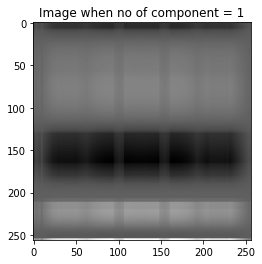

In [ ]:
#plotting the image of selected principal components 1.
plt.imshow(reconstructed_image1,cmap="gray")
plt.title("Image when no of component = 1") 

Text(0.5, 1.0, 'Image when no of component = 5')

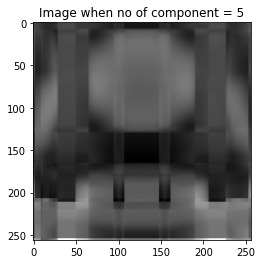

In [ ]:
#plotting the image of selected principal components 5.
plt.imshow(reconstructed_image2,cmap="gray")
plt.title("Image when no of component = 5") 

Text(0.5, 1.0, 'Image when no of component = 18')

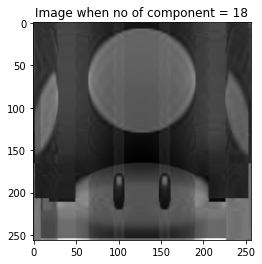

In [ ]:
#plotting the image of selected principal components 18.
plt.imshow(reconstructed_image3,cmap="gray")
plt.title("Image when no of component = 18") 

Text(0.5, 1.0, 'Image when no of component = 18')

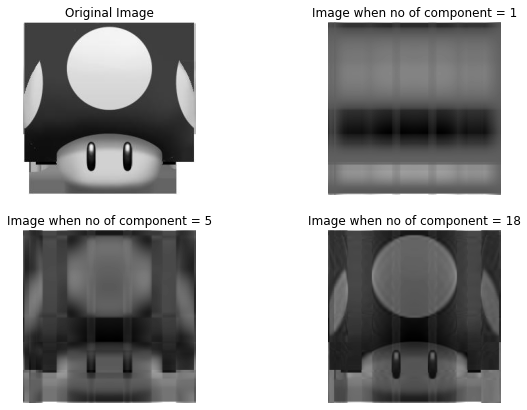

In [ ]:
fig = plt.figure(figsize=(10, 7))
rows = 2
columns = 2

OrgImage = cv2.imread('Gray_Ludo.jpg')
#plotting orginal image.
fig.add_subplot(rows, columns, 1)
plt.imshow(OrgImage)
plt.axis('off')
plt.title("Original Image")


fig.add_subplot(rows, columns, 2)
plt.imshow(reconstructed_image1,cmap="gray")
plt.axis('off')
plt.title("Image when no of component = 1") 

fig.add_subplot(rows, columns, 3)
plt.imshow(reconstructed_image2,cmap="gray")
plt.axis('off')
plt.title("Image when no of component = 5") 

fig.add_subplot(rows, columns, 4)
plt.imshow(reconstructed_image3,cmap="gray")
plt.axis('off')
plt.title("Image when no of component = 18") 


For each eigenvalue, a chosen real picture  and its tworebuilt components are obtained and shown. The weighted color sum, which compares the intensity of pictures extracted from the source image, is evaluated as the first principal component. In the eigenvalue list, the variance values for each major component are listed. These show how much variation in the feature space is accounted for by each component. The components explain all the variance in the data. PCA captures the maximum variance in the first component, then in the second component, and henceforth followed by the other components.


[[ 1.47006781 -0.45939792 -0.02211166 ... -0.05077346  1.27541517
   1.28746029]
 [ 1.43745358 -0.45032478 -0.02948752 ... -0.05006369  1.25467452
   1.26366257]
 [ 0.04232674 -0.0180396  -0.28022855 ... -0.0089173   0.20030216
   0.18631207]
 ...
 [ 0.45202333 -0.14244334 -0.04147283 ... -0.02142809  0.52891219
   0.52753039]
 [ 0.51230531 -0.16106588 -0.04203097 ... -0.02386365  0.59049286
   0.58998795]
 [ 0.55654129 -0.17457814 -0.04207373 ... -0.02561456  0.6349352
   0.63547858]]


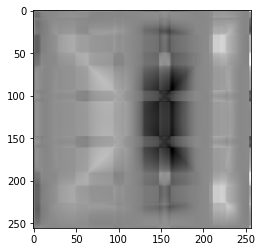

In [24]:
#Finalset= reconstructed_A.T * reconstructed_image1.T
#print(Finalset)
#plt.imshow(Finalset,cmap="gray")